In [1]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\patel\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\patel\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\patel\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\patel\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers\averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\patel\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       tagge

True

In [2]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [5]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [6]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\patel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\patel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\patel\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [7]:
# Load datasets
df_real = pd.read_csv(r"C:\Users\patel\Desktop\Final\fake.csv") # The True News Dataset
df_real.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [8]:
df_real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [9]:
df_real.shape

(23481, 4)

In [10]:
df_real.describe()

,title,text,subject,date
count,23481,23481,23481,23481
unique,17903,17455,6,1681
top,MEDIA IGNORES Time That Bill Clinton FIRED His...,,News,"May 10, 2017"
freq,6,626,9050,46


In [12]:
df_fake= pd.read_csv(r"C:\Users\patel\Desktop\Final\fake.csv") # The Fake News Dataset
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [13]:
df_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [14]:
df_fake.shape

(23481, 4)

In [15]:
df_fake.describe()

,title,text,subject,date
count,23481,23481,23481,23481
unique,17903,17455,6,1681
top,MEDIA IGNORES Time That Bill Clinton FIRED His...,,News,"May 10, 2017"
freq,6,626,9050,46


In [16]:
df_real.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [17]:
df_fake.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [18]:
df_real.duplicated().sum()

3

In [19]:
df_real.drop_duplicates(inplace=True) #Dropping the Duplicate values

In [20]:
df_fake.duplicated().sum()

3

In [21]:
df_fake.drop_duplicates(inplace=True)

In [22]:
df_fake.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23478 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23478 non-null  object
 1   text     23478 non-null  object
 2   subject  23478 non-null  object
 3   date     23478 non-null  object
dtypes: object(4)
memory usage: 917.1+ KB


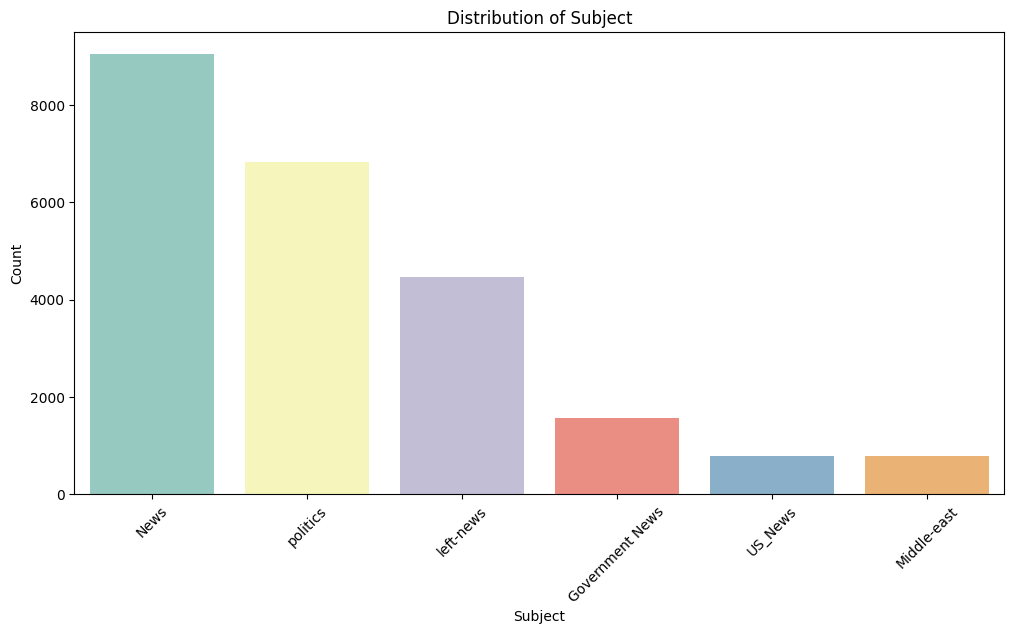

In [23]:
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.countplot(x='subject', data=df_fake, order=df_fake['subject'].value_counts().index, palette='Set3')
plt.title('Distribution of Subject')
plt.xlabel('Subject')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
#Distribution of Subjects in Fake News Dataset

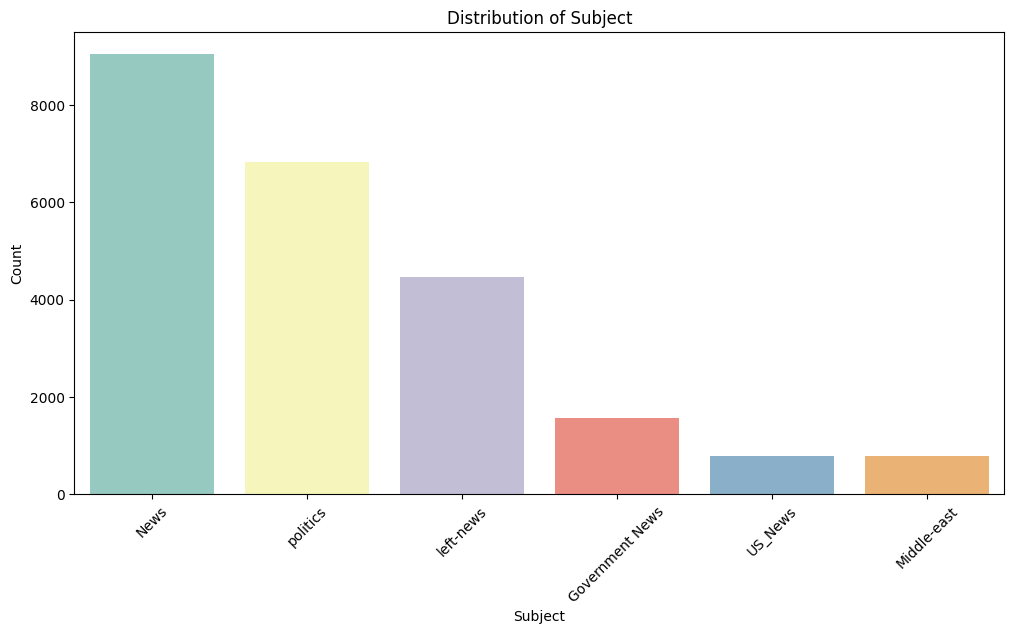

In [24]:
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.countplot(x='subject', data=df_real, order=df_real['subject'].value_counts().index, palette='Set3')
plt.title('Distribution of Subject')
plt.xlabel('Subject')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
#Distribution of Subjects in True News Dataset

In [25]:
! pip install wordcloud


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [26]:
df_real['label'] = 1
df_fake['label'] = 0

In [27]:
df_fake.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [28]:
# Combine 'title' and 'text' columns into a new column 'News'
df_real['News'] = df_real['title'] + ' ' + df_real['text']
df_fake['News'] = df_fake['title'] + ' ' + df_fake['text']

In [29]:
# Step 1: Verify shapes of df_real and df_fake before concatenation
print("Shape of df_real:", df_real.shape)
print("Shape of df_fake:", df_fake.shape)

# Step 2: Concatenate df_real and df_fake to create df_combined
df_combined = pd.concat([df_real, df_fake], ignore_index=True)

# Reset the index of df_combined if necessary
df_combined.reset_index(drop=True, inplace=True)

# Convert label values: 0 for fake news and 1 for real news
df_combined['label'] = (df_combined['label'] == 1).astype(int)

# Check the first few rows to verify the label assignment
print(df_combined.head())


# Check the shape of df_combined
print("Shape of df_combined:", df_combined.shape)

# Step 3 (optional): Check for duplicated rows in df_combined
duplicated_rows = df_combined[df_combined.duplicated()]
if not duplicated_rows.empty:
    print("Duplicated rows found in df_combined:\n", duplicated_rows)
else:
    print("No duplicated rows found in df_combined.")


Shape of df_real: (23478, 6)
Shape of df_fake: (23478, 6)
                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  label                                               News  
0  December 31, 2017      1   Donald Trump Sends Out Embarrassing New Year’...  
1  December 31, 2017      1   Drunk Bragging Trump Staffer

In [30]:
df_combined.tail()

,title,text,subject,date,label,News
46951,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0,McPain: John McCain Furious That Iran Treated ...
46952,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...
46953,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...
46954,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0,How to Blow $700 Million: Al Jazeera America F...
46955,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0,10 U.S. Navy Sailors Held by Iranian Military ...


In [31]:
df_combined.head()

,title,text,subject,date,label,News
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1,Donald Trump Sends Out Embarrassing New Year’...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1,Drunk Bragging Trump Staffer Started Russian ...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1,Sheriff David Clarke Becomes An Internet Joke...
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1,Trump Is So Obsessed He Even Has Obama’s Name...
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1,Pope Francis Just Called Out Donald Trump Dur...


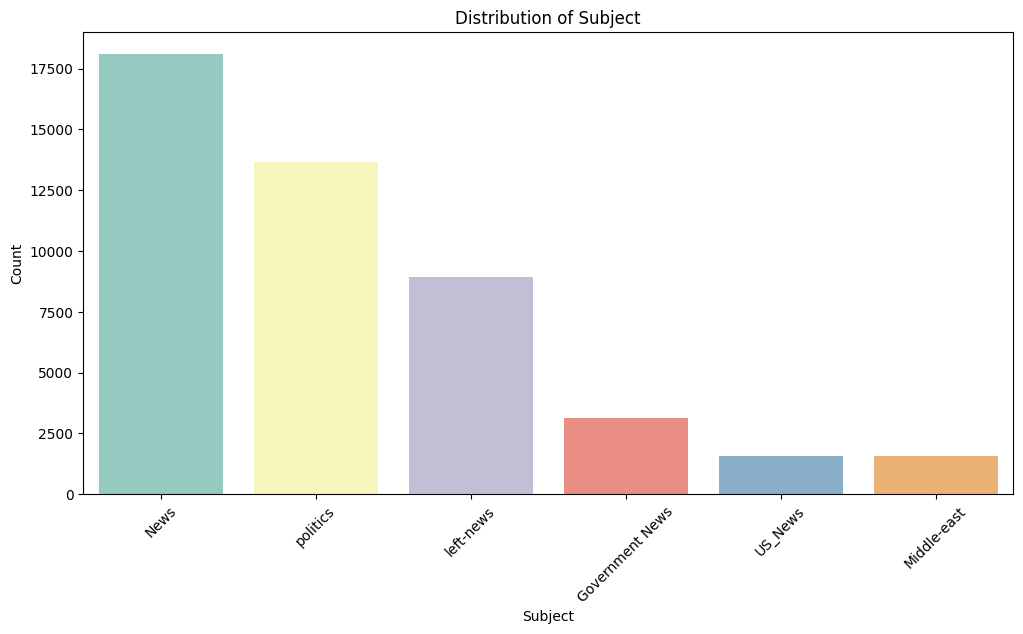

In [32]:
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.countplot(x='subject', data=df_combined, order=df_combined['subject'].value_counts().index, palette='Set3')
plt.title('Distribution of Subject')
plt.xlabel('Subject')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
#Distribution of Subjects in Combined Dataset

In [33]:
# Drop the 'title', 'text', and 'date' columns
df_real.drop(columns=['title', 'text', 'date','subject'], inplace=True)
df_fake.drop(columns=['title', 'text', 'date','subject'], inplace=True)
df_combined.drop(columns=['title', 'text', 'date','subject'], inplace=True)

In [34]:
df_real.head()

,label,News
0,1,Donald Trump Sends Out Embarrassing New Year’...
1,1,Drunk Bragging Trump Staffer Started Russian ...
2,1,Sheriff David Clarke Becomes An Internet Joke...
3,1,Trump Is So Obsessed He Even Has Obama’s Name...
4,1,Pope Francis Just Called Out Donald Trump Dur...


In [35]:
df_fake.head()

,label,News
0,0,Donald Trump Sends Out Embarrassing New Year’...
1,0,Drunk Bragging Trump Staffer Started Russian ...
2,0,Sheriff David Clarke Becomes An Internet Joke...
3,0,Trump Is So Obsessed He Even Has Obama’s Name...
4,0,Pope Francis Just Called Out Donald Trump Dur...


In [36]:
df_combined.head()

,label,News
0,1,Donald Trump Sends Out Embarrassing New Year’...
1,1,Drunk Bragging Trump Staffer Started Russian ...
2,1,Sheriff David Clarke Becomes An Internet Joke...
3,1,Trump Is So Obsessed He Even Has Obama’s Name...
4,1,Pope Francis Just Called Out Donald Trump Dur...


In [37]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download WordNet if not already downloaded
nltk.download('wordnet')

# Initialize WordNet lemmatizer and get English stopwords
lemmatizer = WordNetLemmatizer()
stopwords = set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text) #Removes square brackets and their contents from the text.
    text = re.sub('https?://\S+|www\.\S+', '', text) # Remove URLs
    text = re.sub('<.*?>+', '', text)#Removes HTML tags from the text.
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)#Removes punctuation marks from the text.
    text = re.sub('\n', '', text) #Removes newline characters from the text.
    text = re.sub('\w*\d\w*', '', text)  # Remove digits
     # Remove remaining punctuation (excluding hyphens and apostrophes)
    text = re.sub(r'[!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]', '', text)
    text = [word for word in text.split() if word not in stopwords]
    text = [lemmatizer.lemmatize(word) for word in text]
    text = " ".join(text)
    return text

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\patel\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [38]:
# Apply preprocessing to the 'News' column in df_real,df_combined and df_fake
df_real['News'] = df_real['News'].apply(clean)

In [39]:
df_real.shape

(23478, 2)

In [40]:
df_fake['News'] = df_fake['News'].apply(clean)

In [41]:
df_fake.shape

(23478, 2)

In [42]:
df_combined['News'] = df_combined['News'].apply(clean)

In [43]:
df_combined.shape

(46956, 2)

In [44]:
df_combined.head()

,label,News
0,1,donald trump sends embarrassing new year’s eve...
1,1,drunk bragging trump staffer started russian c...
2,1,sheriff david clarke becomes internet joke thr...
3,1,trump obsessed even obama’s name coded website...
4,1,pope francis called donald trump christmas spe...


In [45]:
df_fake.head()

,label,News
0,0,donald trump sends embarrassing new year’s eve...
1,0,drunk bragging trump staffer started russian c...
2,0,sheriff david clarke becomes internet joke thr...
3,0,trump obsessed even obama’s name coded website...
4,0,pope francis called donald trump christmas spe...


In [46]:
df_real.head()

,label,News
0,1,donald trump sends embarrassing new year’s eve...
1,1,drunk bragging trump staffer started russian c...
2,1,sheriff david clarke becomes internet joke thr...
3,1,trump obsessed even obama’s name coded website...
4,1,pope francis called donald trump christmas spe...


In [47]:
df_combined.tail()

,label,News
46951,0,mcpain john mccain furious iran treated u sail...
46952,0,justice yahoo settle email privacy classaction...
46953,0,sunnistan u allied ‘safe zone’ plan take terri...
46954,0,blow million al jazeera america finally call q...
46955,0,u navy sailor held iranian military – sign neo...


In [48]:
from collections import Counter

# Tokenize the cleaned text
real_words = ' '.join(df_real['News']).split()
fake_words = ' '.join(df_fake['News']).split()
combined_words = ' '.join(df_combined['News']).split()

# Get the frequency of words
real_word_freq = Counter(real_words)
fake_word_freq = Counter(fake_words)
combined_word_freq = Counter(combined_words)

# Get top 100 words based on frequency
top_100_real_words = real_word_freq.most_common(100)
top_100_fake_words = fake_word_freq.most_common(100)
top_100_combined_words = combined_word_freq.most_common(100)


In [49]:
# Print the top 100 words in each dataset
print("Top 100 words in real news:")
print(top_100_real_words)


Top 100 words in real news:
[('trump', 80652), ('said', 31198), ('president', 27075), ('people', 26424), ('one', 24233), ('would', 23652), ('u', 23258), ('state', 22446), ('clinton', 19518), ('obama', 19470), ('like', 18510), ('time', 18062), ('donald', 17902), ('republican', 16828), ('american', 16648), ('say', 16157), ('also', 15245), ('hillary', 15192), ('year', 15001), ('new', 14987), ('news', 14815), ('image', 14169), ('white', 13865), ('even', 13831), ('get', 13095), ('right', 12795), ('make', 12225), ('know', 12128), ('video', 11842), ('woman', 11723), ('medium', 11676), ('campaign', 11469), ('house', 11231), ('via', 11177), ('america', 11057), ('country', 10863), ('could', 10408), ('first', 10289), ('want', 10250), ('going', 9983), ('think', 9928), ('many', 9724), ('election', 9634), ('way', 9563), ('day', 9525), ('told', 9250), ('government', 9201), ('thing', 9102), ('go', 9011), ('back', 8955), ('black', 8889), ('police', 8873), ('law', 8848), ('made', 8843), ('show', 8589), 

In [50]:
print("\nTop 100 words in fake news:")
print(top_100_fake_words)



Top 100 words in fake news:
[('trump', 80652), ('said', 31198), ('president', 27075), ('people', 26424), ('one', 24233), ('would', 23652), ('u', 23258), ('state', 22446), ('clinton', 19518), ('obama', 19470), ('like', 18510), ('time', 18062), ('donald', 17902), ('republican', 16828), ('american', 16648), ('say', 16157), ('also', 15245), ('hillary', 15192), ('year', 15001), ('new', 14987), ('news', 14815), ('image', 14169), ('white', 13865), ('even', 13831), ('get', 13095), ('right', 12795), ('make', 12225), ('know', 12128), ('video', 11842), ('woman', 11723), ('medium', 11676), ('campaign', 11469), ('house', 11231), ('via', 11177), ('america', 11057), ('country', 10863), ('could', 10408), ('first', 10289), ('want', 10250), ('going', 9983), ('think', 9928), ('many', 9724), ('election', 9634), ('way', 9563), ('day', 9525), ('told', 9250), ('government', 9201), ('thing', 9102), ('go', 9011), ('back', 8955), ('black', 8889), ('police', 8873), ('law', 8848), ('made', 8843), ('show', 8589),

In [51]:
# Print the top 100 words in the combined dataset
print("\nTop 100 words in combined dataset:")
print(top_100_combined_words)



Top 100 words in combined dataset:
[('trump', 161304), ('said', 62396), ('president', 54150), ('people', 52848), ('one', 48466), ('would', 47304), ('u', 46516), ('state', 44892), ('clinton', 39036), ('obama', 38940), ('like', 37020), ('time', 36124), ('donald', 35804), ('republican', 33656), ('american', 33296), ('say', 32314), ('also', 30490), ('hillary', 30384), ('year', 30002), ('new', 29974), ('news', 29630), ('image', 28338), ('white', 27730), ('even', 27662), ('get', 26190), ('right', 25590), ('make', 24450), ('know', 24256), ('video', 23684), ('woman', 23446), ('medium', 23352), ('campaign', 22938), ('house', 22462), ('via', 22354), ('america', 22114), ('country', 21726), ('could', 20816), ('first', 20578), ('want', 20500), ('going', 19966), ('think', 19856), ('many', 19448), ('election', 19268), ('way', 19126), ('day', 19050), ('told', 18500), ('government', 18402), ('thing', 18204), ('go', 18022), ('back', 17910), ('black', 17778), ('police', 17746), ('law', 17696), ('made', 

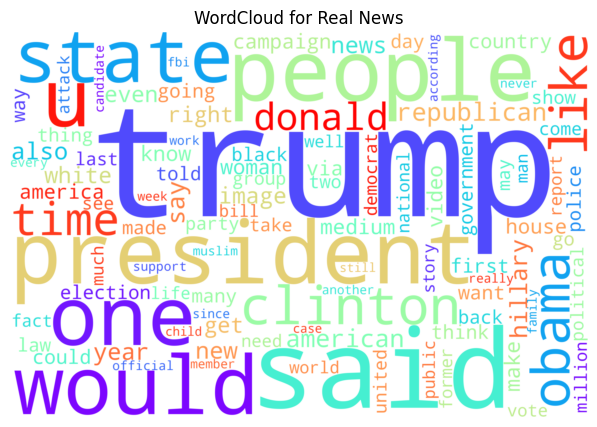

In [52]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Generate WordCloud for real news
wordcloud_real = WordCloud(width=3000, height=2000, random_state=1, background_color='white', colormap='rainbow').generate_from_frequencies(dict(top_100_real_words))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_real, interpolation='bilinear')
plt.title('WordCloud for Real News')
plt.axis('off')
plt.show()


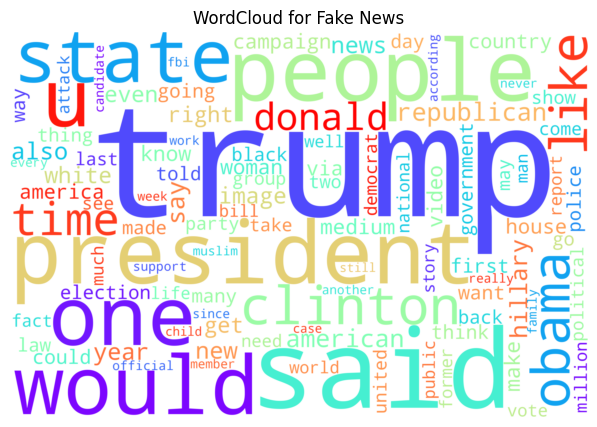

In [53]:
# Generate WordCloud for fake news
wordcloud_fake = WordCloud(width=3000, height=2000, random_state=1, background_color='white', colormap='rainbow').generate_from_frequencies(dict(top_100_fake_words))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.title('WordCloud for Fake News')
plt.axis('off')
plt.show()

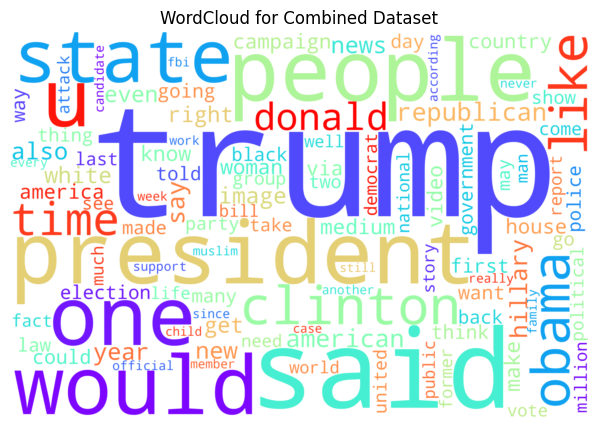

In [54]:
# Generate WordCloud for combined dataset
wordcloud_combined = WordCloud(width=3000, height=2000, random_state=1, background_color='white', colormap='rainbow').generate_from_frequencies(dict(top_100_combined_words))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_combined, interpolation='bilinear')
plt.title('WordCloud for Combined Dataset')
plt.axis('off')
plt.show()

### Task 2 – Building Machine Learning Model

In [56]:
df_combined.head()

,label,News
0,1,donald trump sends embarrassing new year’s eve...
1,1,drunk bragging trump staffer started russian c...
2,1,sheriff david clarke becomes internet joke thr...
3,1,trump obsessed even obama’s name coded website...
4,1,pope francis called donald trump christmas spe...


In [57]:
df_combined_shuffled = df_combined.sample(frac=1, random_state=42)

In [58]:
df_combined_shuffled.tail()

,label,News
11284,1,senior cia intel “wiretapping trump transition...
44732,0,jihadi’s tie isi exposed…obama’s doj tell musl...
38158,0,watch desperate granny hillary clinton hip sel...
860,1,trump stole idea north korean propaganda parod...
15795,1,watch judge tell disrespectful gangbanger taxp...


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
data = pd.read_csv(r"C:\Users\patel\Desktop\Final\fake.csv")

# Combine title and text for feature extraction
data['combined_text'] = data['title'] + ' ' + data['text']

# Split the data into features and target
X = data['combined_text']
y = data['subject']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=100)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Bagging Classifier using Decision Trees
bagging_model = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42)
bagging_model.fit(X_train_tfidf, y_train)
y_pred_bagging = bagging_model.predict(X_test_tfidf)

# Boosting Classifier using AdaBoost
boosting_model = AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42)
boosting_model.fit(X_train_tfidf, y_train)
y_pred_boosting = boosting_model.predict(X_test_tfidf)

# Evaluate the models
print("Bagging Classifier Accuracy:", accuracy_score(y_test, y_pred_bagging))
print("Bagging Classifier Report:\n", classification_report(y_test, y_pred_bagging))

print("Boosting Classifier Accuracy:", accuracy_score(y_test, y_pred_boosting))
print("Boosting Classifier Report:\n", classification_report(y_test, y_pred_boosting))


c:\Users\patel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Bagging Classifier Accuracy: 0.4598680008516074
Bagging Classifier Report:
                  precision    recall  f1-score   support

Government News       0.06      0.04      0.05       316
    Middle-east       0.03      0.03      0.03       159
           News       0.88      0.89      0.88      1821
        US_News       0.08      0.08      0.08       160
      left-news       0.07      0.07      0.07       897
       politics       0.30      0.34      0.32      1344

       accuracy                           0.46      4697
      macro avg       0.24      0.24      0.24      4697
   weighted avg       0.45      0.46      0.45      4697

Boosting Classifier Accuracy: 0.4426229508196721
Boosting Classifier Report:
                  precision    recall  f1-score   support

Government News       0.02      0.02      0.02       316
    Middle-east       0.05      0.04      0.05       159
           News       0.87      0.86      0.87      1821
        US_News       0.04      0.04      0.

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.utils import shuffle

# Assuming 'data' is your initial DataFrame with columns 'combined_text' and 'subject'
df_combined = pd.DataFrame({
    'News': data['combined_text'],  # Your combined text data
    'label': data['subject']        # Your label column
})

# Shuffle the combined dataset
df_combined_shuffled = shuffle(df_combined, random_state=42)

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(df_combined_shuffled['News'], df_combined_shuffled['label'], test_size=0.3, random_state=42)

# Define feature extraction methods
vectorizers = [
    ('Bag-of-Words', CountVectorizer()),
    ('TF-IDF', TfidfVectorizer()),
    ('Term Frequency', CountVectorizer(binary=True))
]

# Define machine learning models
models = [
    ('Logistic Regression', LogisticRegression(max_iter=200)),
    ('Multinomial Naive Bayes', MultinomialNB()),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42))
]

# Train and evaluate models for each feature extraction method
for vectorizer_name, vectorizer in vectorizers:
    print(f"Vectorizer: {vectorizer_name}")
    print("=" * 50)
    for model_name, model in models:
        print(f"Model: {model_name}")
        # Extract features from text data
        X_train_features = vectorizer.fit_transform(X_train)
        X_test_features = vectorizer.transform(X_test)
        
        # Train the model
        model.fit(X_train_features, y_train)
        
        # Predict labels on the test set
        y_pred = model.predict(X_test_features)
        
        # Evaluate model performance
        report = classification_report(y_test, y_pred, output_dict=True)
        
        # Print results
        print(f"Accuracy: {report['accuracy']:.4f}")
        print("="*50)
    print()


Vectorizer: Bag-of-Words
Model: Logistic Regression


c:\Users\patel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.5801
Model: Multinomial Naive Bayes
Accuracy: 0.5444
Model: Random Forest


In [ ]:
df_combined_shuffled.head()

,label,News
37174,0,breaking dnc staffer may sold sensitive info “...
9390,1,sander reject deal puerto rico offer alternati...
41276,0,“hill”arious video hillary take break seizure ...
24798,0,china fire warning trump contacting taiwan vio...
9399,1,u panel probing benghazi attack report within ...


### Task 3 – Enhanced NLP Features : 

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.utils import shuffle
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag

# Define POS tags for filtering
noun_tags = ['NN', 'NNS', 'NNP', 'NNPS']
verb_tags = ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']
adj_noun_tags = ['JJ', 'JJR', 'JJS', 'NN', 'NNS', 'NNP', 'NNPS']

# Function to filter text based on POS tags
def pos_filter(text, pos_tags):
    tokens = word_tokenize(text)
    tagged_tokens = pos_tag(tokens)
    filtered_tokens = [token for token, tag in tagged_tokens if tag in pos_tags]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text


# Define feature extraction methods
vectorizers = [
    ('Bag-of-Words', CountVectorizer()),
    ('TF-IDF', TfidfVectorizer()),
    ('Term Frequency', CountVectorizer(binary=True))
]

# Define machine learning models
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Multinomial Naive Bayes', MultinomialNB()),
    ('Random Forest', RandomForestClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier())
]

# Define feature filters
feature_filters = [
    ('Nouns', noun_tags),
    ('Verbs', verb_tags),
    ('Adjectives + Nouns', adj_noun_tags)
]

# Train and evaluate models for each feature extraction method and feature filter
for vectorizer_name, vectorizer in vectorizers:
    print(f"Vectorizer: {vectorizer_name}")
    print("=" * 50)
    for feature_filter_name, pos_tags in feature_filters:
        print(f"Feature Filter: {feature_filter_name}")
        print("-" * 50)
        # Apply POS tagging and filtering
        df_combined_filtered = df_combined_shuffled['News'].apply(lambda x: pos_filter(x, pos_tags))
        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(df_combined_filtered, df_combined_shuffled['label'], test_size=0.3, random_state=42)
        for model_name, model in models:
            print(f"Model: {model_name}")
            # Extract features from text data
            X_train_features = vectorizer.fit_transform(X_train)
            X_test_features = vectorizer.transform(X_test)
            # Train the model
            model.fit(X_train_features, y_train)
            # Predict labels on the test set
            y_pred = model.predict(X_test_features)
            # Evaluate model performance
            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred)
            recall = recall_score(y_test, y_pred)
            # Print results
            print(f"Accuracy: {accuracy:.4f}")
            print(f"Precision: {precision:.4f}")
            print(f"Recall: {recall:.4f}")
            print("=" * 50)
        print()


Vectorizer: Bag-of-Words
Feature Filter: Nouns
--------------------------------------------------
Model: Logistic Regression
Accuracy: 0.9908
Precision: 0.9919
Recall: 0.9885
Model: Multinomial Naive Bayes
Accuracy: 0.9378
Precision: 0.9292
Recall: 0.9403
Model: Random Forest
Accuracy: 0.9831
Precision: 0.9798
Recall: 0.9847
Model: Gradient Boosting
Accuracy: 0.9887
Precision: 0.9922
Recall: 0.9839

Feature Filter: Verbs
--------------------------------------------------
Model: Logistic Regression


C:\Users\santh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9528
Precision: 0.9548
Recall: 0.9450
Model: Multinomial Naive Bayes
Accuracy: 0.9414
Precision: 0.9227
Recall: 0.9565
Model: Random Forest
Accuracy: 0.9502
Precision: 0.9434
Recall: 0.9521
Model: Gradient Boosting
Accuracy: 0.8880
Precision: 0.8707
Recall: 0.8965

Feature Filter: Adjectives + Nouns
--------------------------------------------------
Model: Logistic Regression
Accuracy: 0.9925
Precision: 0.9931
Recall: 0.9910
Model: Multinomial Naive Bayes
Accuracy: 0.9418
Precision: 0.9356
Recall: 0.9420
Model: Random Forest
Accuracy: 0.9864
Precision: 0.9828
Recall: 0.9887
Model: Gradient Boosting
Accuracy: 0.9883
Precision: 0.9914
Recall: 0.9838

Vectorizer: TF-IDF
Feature Filter: Nouns
--------------------------------------------------
Model: Logistic Regression
Accuracy: 0.9806
Precision: 0.9801
Recall: 0.9789
Model: Multinomial Naive Bayes
Accuracy: 0.9218
Precision: 0.9177
Recall: 0.9170
Model: Random Forest
Accuracy: 0.9811
Precision: 0.9788
Recall: 0.9813
Model: Gra